In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')
# Import the numpy and pandas package

import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Reading the CSV file 'days_updated.csv' into a DataFrame named 'df'
df = pd.read_csv('days_updated.csv')

# Displaying the contents of the DataFrame 'df'
df


,dteday,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,casual,registered,cnt,day,Spring,Summer,Winter,Light Rain/Snow,Mist
0,2018-01-01,0,1,0,1,1,14.110847,80.5833,10.749882,331,654,985,0,1,0,0,0,1
1,2018-01-02,0,1,0,2,1,14.902598,69.6087,16.652113,131,670,801,1,1,0,0,0,1
2,2018-01-03,0,1,0,3,1,8.050924,43.7273,16.636703,120,1229,1349,2,1,0,0,0,0
3,2018-01-04,0,1,0,4,1,8.200000,59.0435,10.739832,108,1454,1562,3,1,0,0,0,0
4,2018-01-05,0,1,0,5,1,9.305237,43.6957,12.522300,82,1518,1600,4,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2019-12-27,1,12,0,5,1,10.420847,65.2917,23.458911,247,1867,2114,725,1,0,0,0,1
726,2019-12-28,1,12,0,6,0,10.386653,59.0000,10.416557,644,2451,3095,726,1,0,0,0,1
727,2019-12-29,1,12,0,0,0,10.386653,75.2917,8.333661,159,1182,1341,727,1,0,0,0,1
728,2019-12-30,1,12,0,1,1,10.489153,48.3333,23.500518,364,1432,1796,728,1,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   dteday           730 non-null    object 
 1   yr               730 non-null    int64  
 2   mnth             730 non-null    int64  
 3   holiday          730 non-null    int64  
 4   weekday          730 non-null    int64  
 5   workingday       730 non-null    int64  
 6   temp             730 non-null    float64
 7   hum              730 non-null    float64
 8   windspeed        730 non-null    float64
 9   casual           730 non-null    int64  
 10  registered       730 non-null    int64  
 11  cnt              730 non-null    int64  
 12  day              730 non-null    int64  
 13  Spring           730 non-null    int64  
 14  Summer           730 non-null    int64  
 15  Winter           730 non-null    int64  
 16  Light Rain/Snow  730 non-null    int64  
 17  Mist            

In [4]:
#converting dteday to to_datetime dtype
df['dteday'] = pd.to_datetime(df['dteday'])


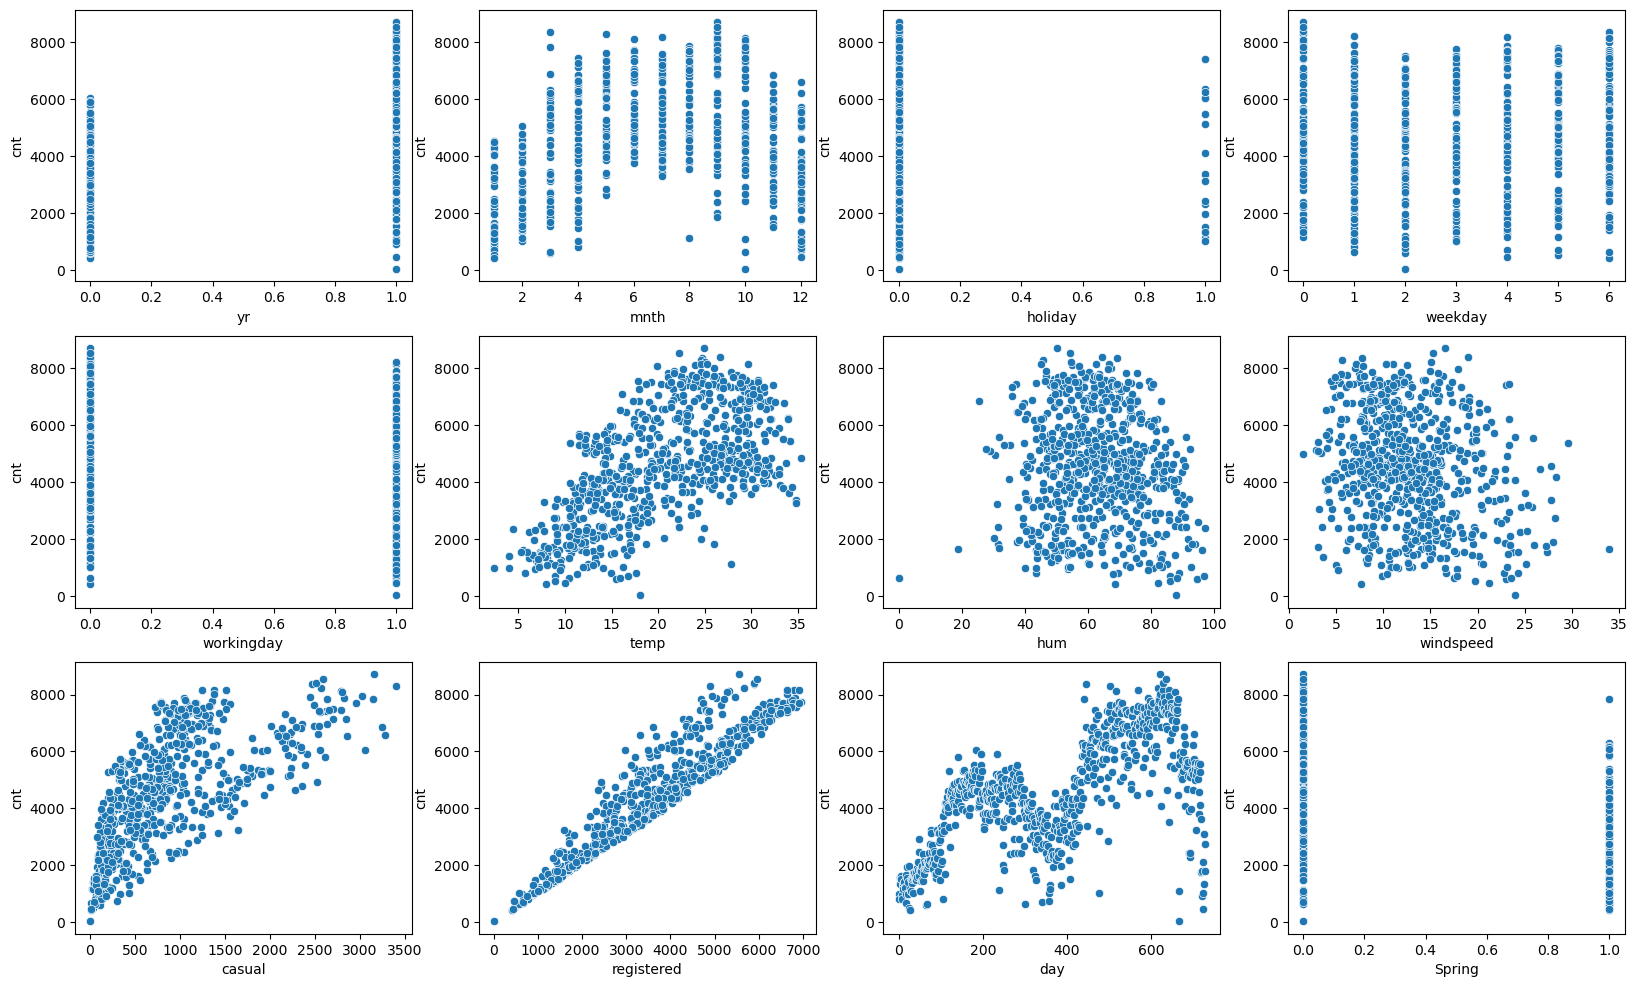

In [5]:
plt.figure(figsize=(20, 12))

# Scatter plot for 'yr' vs 'cnt'
plt.subplot(3, 4, 1)
sns.scatterplot(x='yr', y='cnt', data=df)

# Scatter plot for 'mnth' vs 'cnt'
plt.subplot(3, 4, 2)
sns.scatterplot(x='mnth', y='cnt', data=df)

# Scatter plot for 'holiday' vs 'cnt'
plt.subplot(3, 4, 3)
sns.scatterplot(x='holiday', y='cnt', data=df)

# Scatter plot for 'weekday' vs 'cnt'
plt.subplot(3, 4, 4)
sns.scatterplot(x='weekday', y='cnt', data=df)

# Scatter plot for 'workingday' vs 'cnt'
plt.subplot(3, 4, 5)
sns.scatterplot(x='workingday', y='cnt', data=df)

# Scatter plot for 'temp' vs 'cnt'
plt.subplot(3, 4, 6)
sns.scatterplot(x='temp', y='cnt', data=df)

# Scatter plot for 'temp' vs 'cnt'
plt.subplot(3, 4, 7)
sns.scatterplot(x='hum', y='cnt', data=df)

# Scatter plot for 'temp' vs 'cnt'
plt.subplot(3, 4, 8)
sns.scatterplot(x='windspeed', y='cnt', data=df)

# Scatter plot for 'temp' vs 'cnt'
plt.subplot(3, 4, 9)
sns.scatterplot(x='casual', y='cnt', data=df)

plt.subplot(3, 4, 10)
sns.scatterplot(x='registered', y='cnt', data=df)

plt.subplot(3, 4, 11)
sns.scatterplot(x='day', y='cnt', data=df)

plt.subplot(3, 4, 12)
sns.scatterplot(x='Spring', y='cnt', data=df)
plt.show()


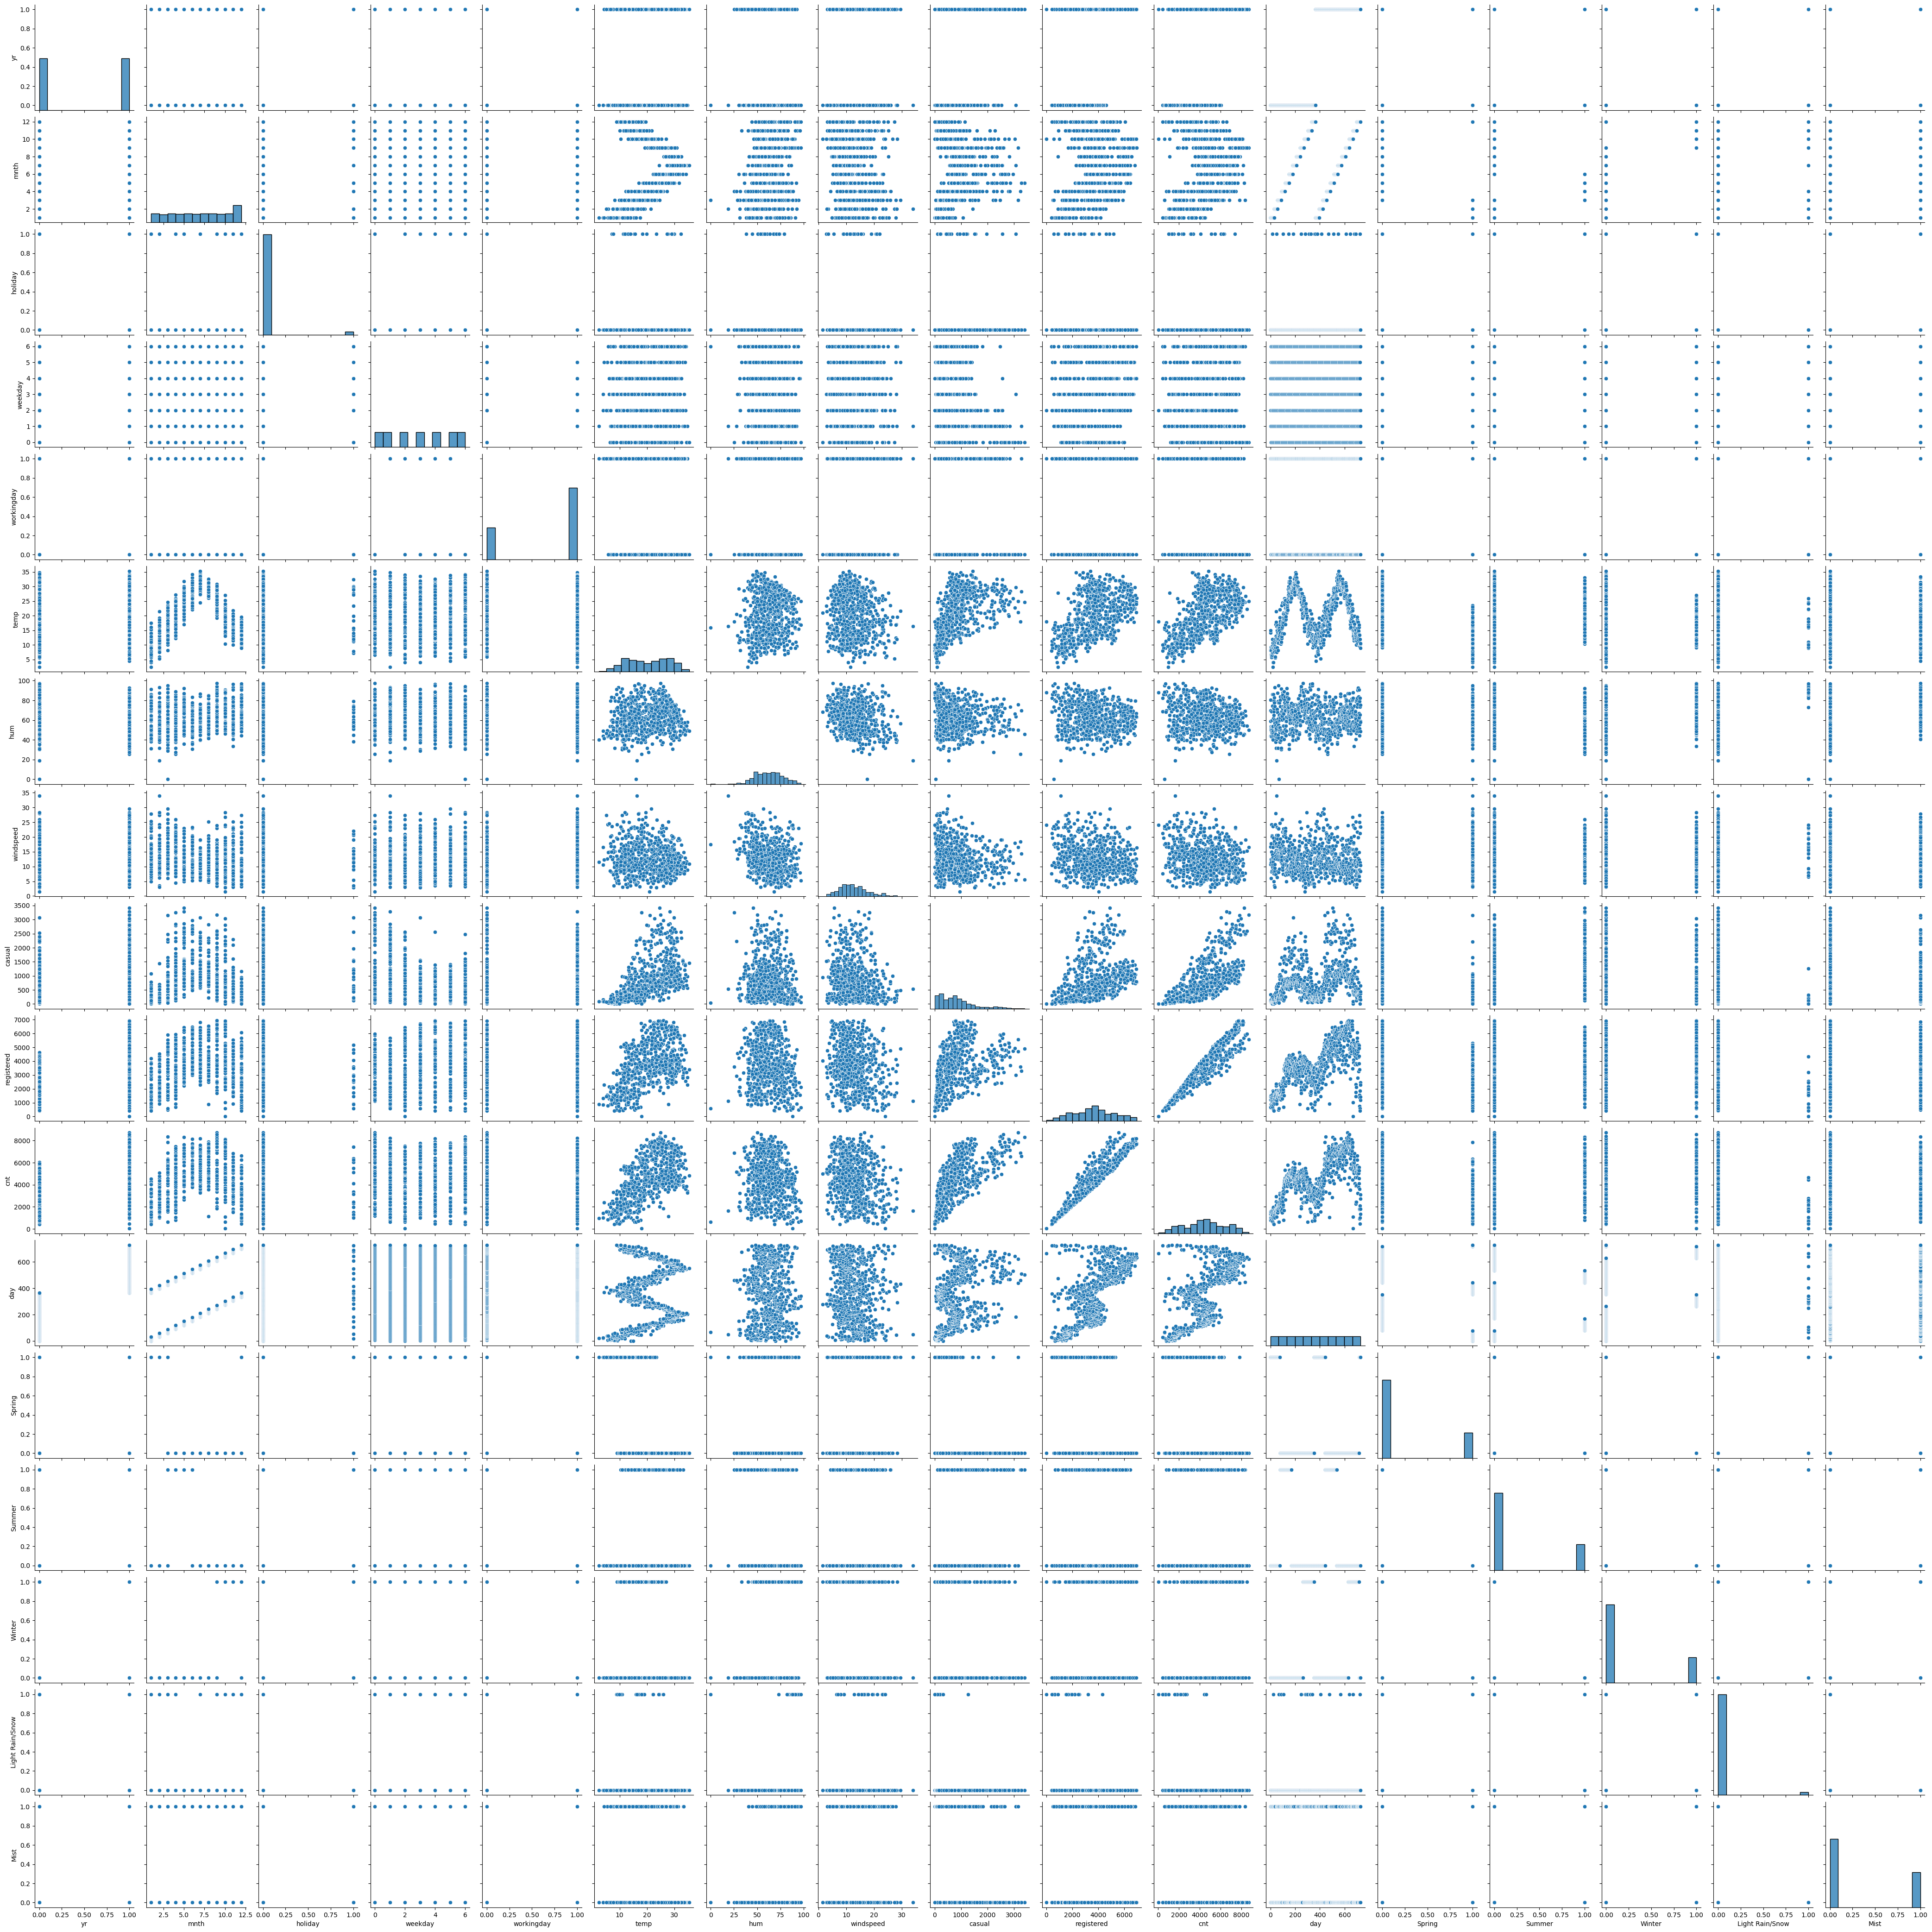

In [6]:
#ploting pair plot
sns.pairplot(df)

# Show the plot
plt.show()

### Now dividing dataframe to training and testing dataframe for model building 

In [8]:
df_train,df_test=train_test_split(df,train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 18)
(220, 18)


In [9]:
df_train.head()

,dteday,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,casual,registered,cnt,day,Spring,Summer,Winter,Light Rain/Snow,Mist
576,2019-07-31,1,7,0,3,1,29.246653,70.4167,11.083475,968,6248,7216,576,0,0,0,0,0
426,2019-03-03,1,3,0,0,0,16.980847,62.1250,10.792293,956,3110,4066,426,1,0,0,0,1
728,2019-12-30,1,12,0,1,1,10.489153,48.3333,23.500518,364,1432,1796,728,1,0,0,0,0
482,2019-04-28,1,4,0,0,0,15.443347,48.9583,8.708325,1120,3100,4220,482,0,1,0,0,1
111,2018-04-22,0,4,0,0,0,13.803347,72.9583,14.707907,177,1506,1683,111,0,1,0,0,1


In [10]:
# Initializing a MinMaxScaler to scale numerical features to a range of [0, 1]
scalar = MinMaxScaler()

# List of numerical variables to be scaled
num_vars = ['mnth', 'weekday', 'temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt', 'day']

# Applying the MinMaxScaler to the specified numerical variables in the 'df_train' DataFrame
df_train[num_vars] = scalar.fit_transform(df_train[num_vars])

# Displaying the first few rows of the updated DataFrame 'df_train' to verify the scaling
df_train.head()


,dteday,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,casual,registered,cnt,day,Spring,Summer,Winter,Light Rain/Snow,Mist
576,2019-07-31,1,0.545455,0,0.500000,1,0.815169,0.725633,0.264686,0.294422,0.899220,0.827658,0.791209,0,0,0,0,0
426,2019-03-03,1,0.181818,0,0.000000,0,0.442393,0.640189,0.255342,0.290765,0.446145,0.465255,0.585165,1,0,0,0,1
728,2019-12-30,1,1.000000,0,0.166667,1,0.245101,0.498067,0.663106,0.110332,0.203869,0.204096,1.000000,1,0,0,0,0
482,2019-04-28,1,0.272727,0,0.000000,0,0.395666,0.504508,0.188475,0.340750,0.444701,0.482973,0.662088,0,1,0,0,1
111,2018-04-22,0,0.272727,0,0.000000,0,0.345824,0.751824,0.380981,0.053337,0.214554,0.191095,0.152473,0,1,0,0,1


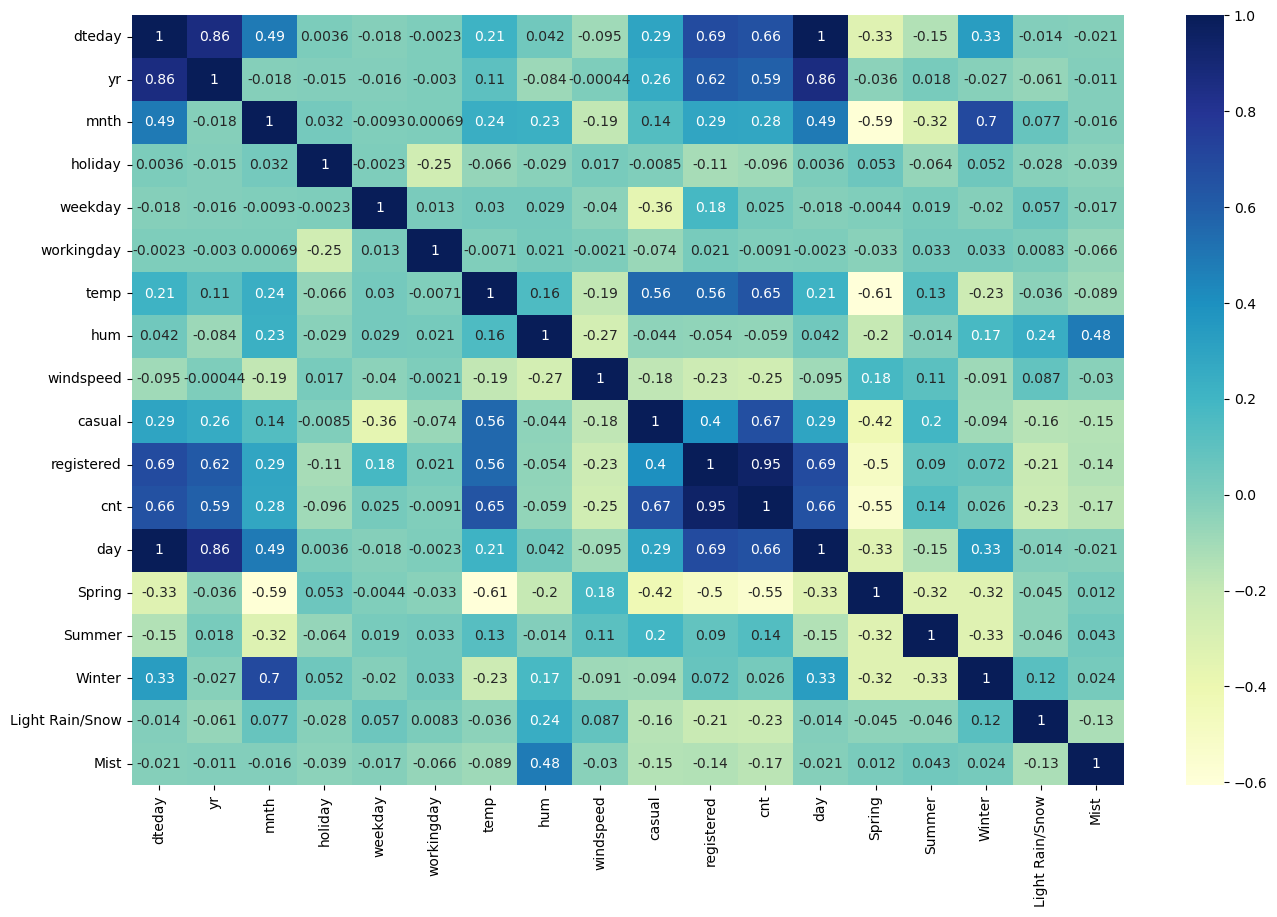

In [11]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [12]:
df_train.head(3)

,dteday,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,casual,registered,cnt,day,Spring,Summer,Winter,Light Rain/Snow,Mist
576,2019-07-31,1,0.545455,0,0.500000,1,0.815169,0.725633,0.264686,0.294422,0.899220,0.827658,0.791209,0,0,0,0,0
426,2019-03-03,1,0.181818,0,0.000000,0,0.442393,0.640189,0.255342,0.290765,0.446145,0.465255,0.585165,1,0,0,0,1
728,2019-12-30,1,1.000000,0,0.166667,1,0.245101,0.498067,0.663106,0.110332,0.203869,0.204096,1.000000,1,0,0,0,0


### Now creating best model which will predict best fit line

In [14]:
# Extracting the target variable 'cnt' from the 'df_train' DataFrame for training
y_train=df_train.cnt

# Defining the feature set 'X_train' by selecting specific columns from the 'df_train' DataFrame
X_train=df_train[['yr','mnth','holiday','weekday','workingday','temp','hum','windspeed','casual','registered','day','Spring','Summer','Winter','Light Rain/Snow','Mist']]


In [15]:
# Selecting the 'registered' column as the feature for the OLS regression model
X_train_sm1=X_train[['registered']]

# Adding a constant to the model to account for the intercept term
X_train_sm1=sm.add_constant(X_train_sm1)

# Creating an OLS regression model with 'y_train' as the dependent variable and 'X_train_sm1' as the independent variable
lr1=sm.OLS(y_train,X_train_sm1)

# Fitting the model
lr_model1=lr1.fit()

# Displaying the parameters of the fitted model
lr_model1.params

# Printing the summary of the regression results
print(lr_model1.summary(),'\n')

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm1.values, i) for i in range(X_train_sm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     4536.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):          2.26e-255
Time:                        09:47:04   Log-Likelihood:                 624.25
No. Observations:                 510   AIC:                            -1244.
Df Residuals:                     508   BIC:                            -1236.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0244      0.008      3.077      0.0

In [16]:
X_train_sm2=X_train[['registered','casual']]

X_train_sm2=sm.add_constant(X_train_sm2)

lr2=sm.OLS(y_train,X_train_sm2)

lr_model2=lr2.fit()

print(lr_model2.params)

print(lr_model2.summary(),'\n')

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm2.values, i) for i in range(X_train_sm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

const        -2.081668e-16
registered    7.968247e-01
casual        3.774735e-01
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.828e+32
Date:                Mon, 30 Sep 2024   Prob (F-statistic):               0.00
Time:                        09:47:04   Log-Likelihood:                 17999.
No. Observations:                 510   AIC:                        -3.599e+04
Df Residuals:                     507   BIC:                        -3.598e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [17]:
X_train_sm3=X_train[['registered','casual','day']]

X_train_sm3=sm.add_constant(X_train_sm3)

lr3=sm.OLS(y_train,X_train_sm3)

lr_model3=lr3.fit()

print(lr_model3.params)

print(lr_model3.summary(),'\n')

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm3.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm3.values, i) for i in range(X_train_sm3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

const         1.110223e-16
registered    7.968247e-01
casual        3.774735e-01
day          -2.602085e-16
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.037e+33
Date:                Mon, 30 Sep 2024   Prob (F-statistic):               0.00
Time:                        09:47:04   Log-Likelihood:                 18117.
No. Observations:                 510   AIC:                        -3.623e+04
Df Residuals:                     506   BIC:                        -3.621e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------

In [18]:
X_train_sm4=X_train[['registered','casual','day','temp']]

X_train_sm4=sm.add_constant(X_train_sm4)

lr4=sm.OLS(y_train,X_train_sm4)

lr_model4=lr4.fit()

print(lr_model4.params)

print(lr_model4.summary(),'\n')

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm4.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm4.values, i) for i in range(X_train_sm4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

const        -3.469447e-18
registered    7.968247e-01
casual        3.774735e-01
day          -2.844947e-16
temp          1.595946e-16
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.797e+31
Date:                Mon, 30 Sep 2024   Prob (F-statistic):               0.00
Time:                        09:47:04   Log-Likelihood:                 17589.
No. Observations:                 510   AIC:                        -3.517e+04
Df Residuals:                     505   BIC:                        -3.515e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      

In [19]:
X_train_sm5=X_train[['registered','casual','day','temp','yr']]

X_train_sm5=sm.add_constant(X_train_sm5)

lr5=sm.OLS(y_train,X_train_sm5)

lr_model5=lr5.fit()

print(lr_model5.params)

print(lr_model5.summary(),'\n')

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm5.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm5.values, i) for i in range(X_train_sm5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

const        -1.006140e-16
registered    7.968247e-01
casual        3.774735e-01
day          -1.309716e-15
temp          3.261280e-16
yr            6.921547e-16
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.241e+31
Date:                Mon, 30 Sep 2024   Prob (F-statistic):               0.00
Time:                        09:47:04   Log-Likelihood:                 17531.
No. Observations:                 510   AIC:                        -3.505e+04
Df Residuals:                     504   BIC:                        -3.503e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err 

In [20]:
# [['yr','mnth','holiday','weekday','workingday','temp','hum','windspeed','casual','registered','day','Spring','Summer','Winter','Light Rain/Snow','Mist']]


X_train_sm6=X_train[['yr','holiday','temp','hum','windspeed','Spring','Summer','Winter','Light Rain/Snow','Mist']]

X_train_sm6=sm.add_constant(X_train_sm6)

lr6=sm.OLS(y_train,X_train_sm6)

lr_model6=lr6.fit()

print(lr_model6.params)

print(lr_model6.summary(),'\n')

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm6.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm6.values, i) for i in range(X_train_sm6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

const              0.293196
yr                 0.230708
holiday           -0.085976
temp               0.495998
hum               -0.140576
windspeed         -0.182979
Spring            -0.074863
Summer             0.043158
Winter             0.087093
Light Rain/Snow   -0.239593
Mist              -0.052191
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     238.2
Date:                Mon, 30 Sep 2024   Prob (F-statistic):          8.27e-183
Time:                        09:47:04   Log-Likelihood:                 485.99
No. Observations:                 510   AIC:                            -950.0
Df Residuals:                     499   BIC:                            -903.4
Df Model:                          10        

In [21]:
# [['yr','mnth','holiday','weekday','workingday','temp','hum','windspeed','casual','registered','day','Spring','Summer','Winter','Light Rain/Snow','Mist']]


X_train_sm8=X_train[['yr','temp','hum','windspeed','Summer','Winter','Light Rain/Snow']]

X_train_sm8=sm.add_constant(X_train_sm8)

lr8=sm.OLS(y_train,X_train_sm8)

lr_model8=lr8.fit()

print(lr_model8.summary(),'\n')

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm8.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm8.values, i) for i in range(X_train_sm8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     309.9
Date:                Mon, 30 Sep 2024   Prob (F-statistic):          1.06e-177
Time:                        09:47:04   Log-Likelihood:                 465.19
No. Observations:                 510   AIC:                            -914.4
Df Residuals:                     502   BIC:                            -880.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2503      0.027     

In [22]:
# [['yr','mnth','holiday','weekday','workingday','temp','hum','windspeed','casual','registered','day','Spring','Summer','Winter','Light Rain/Snow','Mist']]


X_train_sm9=X_train[['yr','temp','Summer','Winter']]

X_train_sm9=sm.add_constant(X_train_sm9)

lr9=sm.OLS(y_train,X_train_sm9)

lr_model9=lr9.fit()

print(lr_model9.summary(),'\n')

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm9.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm9.values, i) for i in range(X_train_sm9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     358.0
Date:                Mon, 30 Sep 2024   Prob (F-statistic):          7.00e-146
Time:                        09:47:04   Log-Likelihood:                 381.73
No. Observations:                 510   AIC:                            -753.5
Df Residuals:                     505   BIC:                            -732.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0137      0.015      0.892      0.3

In [23]:
# [['yr','mnth','holiday','weekday','workingday','temp','hum','windspeed','casual','registered','day','Spring','Summer','Winter','Light Rain/Snow','Mist']]


X_train_sm10=X_train[['casual','yr','temp','Summer','Winter']]

X_train_sm10=sm.add_constant(X_train_sm10)

lr10=sm.OLS(y_train,X_train_sm10)

lr_model10=lr10.fit()

print(lr_model10.summary(),'\n')

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm10.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm10.values, i) for i in range(X_train_sm10.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     386.6
Date:                Mon, 30 Sep 2024   Prob (F-statistic):          7.31e-170
Time:                        09:47:04   Log-Likelihood:                 440.75
No. Observations:                 510   AIC:                            -869.5
Df Residuals:                     504   BIC:                            -844.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0385      0.014      2.783      0.0

### Now finding residual and selecting the best model

### lr_model5

<Axes: ylabel='Density'>

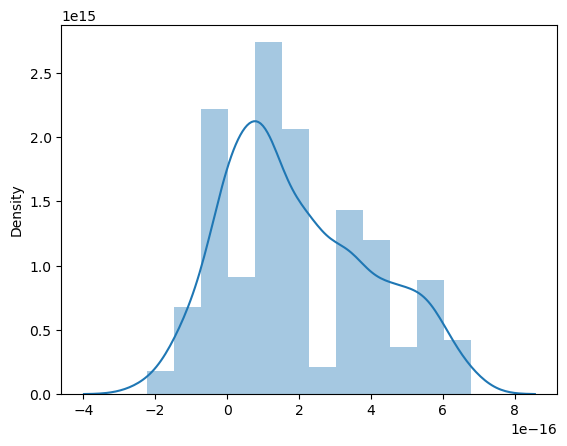

In [26]:
y_train_pred=lr_model5.predict(X_train_sm5)
res=y_train-y_train_pred
sns.distplot(res)

### lr_model6

<Axes: ylabel='Density'>

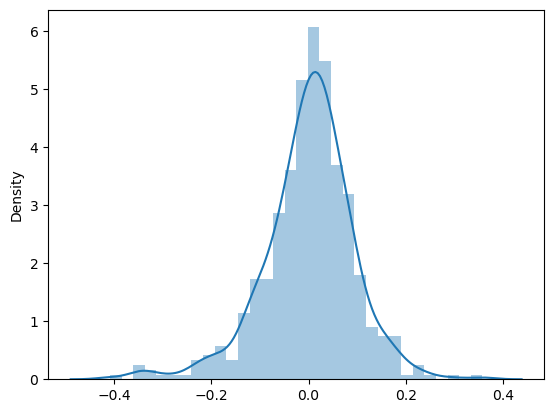

In [28]:
y_train_pred6=lr_model6.predict(X_train_sm6)
res=y_train-y_train_pred6
sns.distplot(res)

### lr_model8

<Axes: ylabel='Density'>

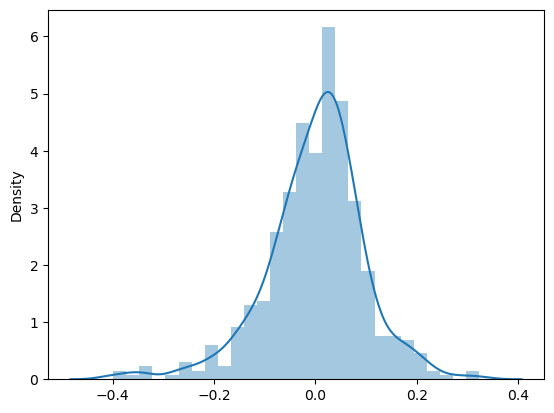

In [30]:
y_train_pred=lr_model8.predict(X_train_sm8)
res=y_train-y_train_pred
sns.distplot(res)

### lr_model9

<Axes: ylabel='Density'>

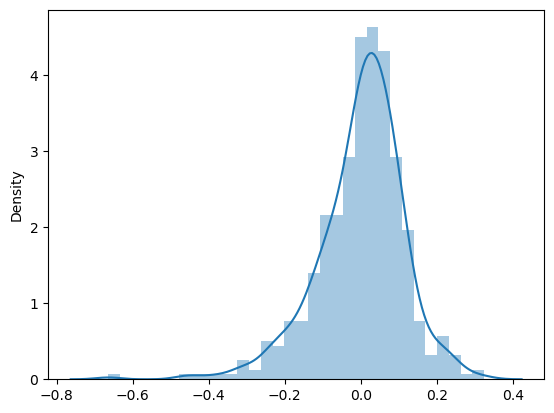

In [32]:
y_train_pred=lr_model9.predict(X_train_sm9)
res=y_train-y_train_pred
sns.distplot(res)

### lr_model10

<Axes: ylabel='Density'>

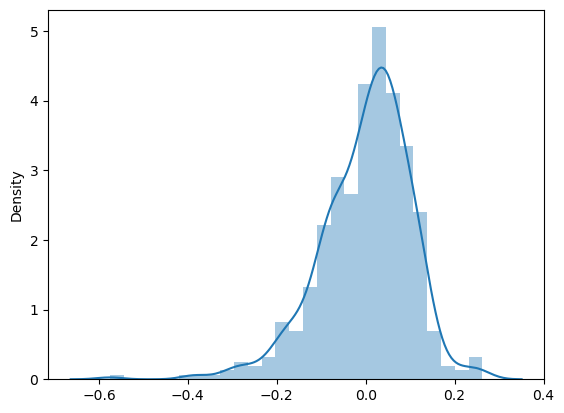

In [34]:
y_train_pred=lr_model10.predict(X_train_sm10)
res=y_train-y_train_pred
sns.distplot(res)

## As we have ploted all the possible models residual , and according to that lr_model6 and lr_model8 looks promising but we only go with the lr_model6 model as it looks more promising

# Testing dataset


In [37]:
df_test[num_vars]=scalar.transform(df_test[num_vars])
df_test.head()

,dteday,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,casual,registered,cnt,day,Spring,Summer,Winter,Light Rain/Snow,Mist
184,2018-07-04,0,0.545455,1,0.500000,0,0.831783,0.657364,0.084219,0.933557,0.427086,0.692706,0.252747,0,0,0,0,1
535,2019-06-20,1,0.454545,0,0.666667,1,0.901354,0.610133,0.153728,0.265163,0.767976,0.712034,0.734890,0,1,0,0,0
299,2018-10-27,0,0.818182,0,1.000000,0,0.511964,0.837699,0.334206,0.072539,0.346376,0.303382,0.410714,0,0,1,0,1
221,2018-08-10,0,0.636364,0,0.833333,1,0.881625,0.437098,0.339570,0.268820,0.559630,0.547400,0.303571,0,0,0,0,0
152,2018-06-02,0,0.454545,0,1.000000,0,0.817246,0.314298,0.537414,0.223712,0.608143,0.569029,0.208791,0,1,0,0,0


In [38]:
y_test=df_test.cnt
X_test=df_test[['yr','mnth','holiday','weekday','workingday','temp','hum','windspeed','casual','registered','day','Spring','Summer','Winter','Light Rain/Snow','Mist']]


In [39]:
# [['yr','mnth','holiday','weekday','workingday','temp','hum','windspeed','casual','registered','day','Spring','Summer','Winter','Light Rain/Snow','Mist']]


X_test_sm1=X_test[['yr','holiday','temp','hum','windspeed','Spring','Summer','Winter','Light Rain/Snow','Mist']]

X_test_sm1=sm.add_constant(X_test_sm1)

y_test_pred=lr_model6.predict(X_test_sm1)

print(r2_score(y_true=y_test,y_pred= y_test_pred))


0.8068409066288983


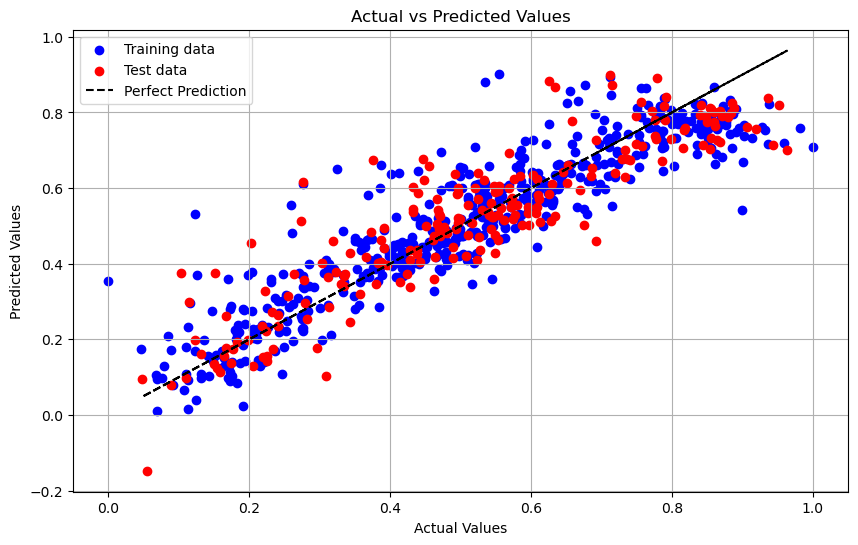

In [40]:
# Plotting the actual vs predicted values for the training data
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values for train data
plt.scatter(y_train, y_train_pred6, color="blue", label="Training data")

# Scatter plot of actual vs predicted values for test data
plt.scatter(y_test, y_test_pred, color="red", label="Test data")
# Plot the perfect prediction line (y = x)
plt.plot(y_test, y_test, color="black", linestyle="--", label="Perfect Prediction")
# Adding labels and title
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

### Now lets inverse_transform to original dataset and predict our final model lr_model6

In [42]:
# Inverse transform the scaled test data back to the original scale
df_test_original = df_test.copy()  # Copy the dataframe to avoid overwriting
df_test_original[num_vars] = scalar.inverse_transform(df_test[num_vars])

# Display the first few rows of the original scale test data
df_test_original.head()


,dteday,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,casual,registered,cnt,day,Spring,Summer,Winter,Light Rain/Snow,Mist
184,2018-07-04,0,7.0,1,3.0,0,29.793347,63.7917,5.459106,3065.0,2978.0,6043.0,184.0,0,0,0,0,1
535,2019-06-20,1,6.0,0,4.0,1,32.082500,59.2083,7.625404,872.0,5339.0,6211.0,535.0,0,1,0,0,0
299,2018-10-27,0,10.0,0,6.0,0,19.270000,81.2917,13.250121,240.0,2419.0,2659.0,299.0,0,0,1,0,1
221,2018-08-10,0,8.0,0,5.0,1,31.433347,42.4167,13.417286,884.0,3896.0,4780.0,221.0,0,0,0,0,0
152,2018-06-02,0,6.0,0,6.0,0,29.315000,30.5000,19.583229,736.0,4232.0,4968.0,152.0,0,1,0,0,0


In [43]:
# Inverse transform the scaled test data back to the original scale
df_train_original = df_train.copy()  # Copy the dataframe to avoid overwriting
df_train_original[num_vars] = scalar.inverse_transform(df_train[num_vars])

# Display the first few rows of the original scale test data
df_train_original.head()


,dteday,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,casual,registered,cnt,day,Spring,Summer,Winter,Light Rain/Snow,Mist
576,2019-07-31,1,7.0,0,3.0,1,29.246653,70.4167,11.083475,968.0,6248.0,7216.0,576.0,0,0,0,0,0
426,2019-03-03,1,3.0,0,0.0,0,16.980847,62.1250,10.792293,956.0,3110.0,4066.0,426.0,1,0,0,0,1
728,2019-12-30,1,12.0,0,1.0,1,10.489153,48.3333,23.500518,364.0,1432.0,1796.0,728.0,1,0,0,0,0
482,2019-04-28,1,4.0,0,0.0,0,15.443347,48.9583,8.708325,1120.0,3100.0,4220.0,482.0,0,1,0,0,1
111,2018-04-22,0,4.0,0,0.0,0,13.803347,72.9583,14.707907,177.0,1506.0,1683.0,111.0,0,1,0,0,1


In [44]:
y_train=df_train_original.cnt
X_train=df_train_original[['yr','mnth','holiday','weekday','workingday','temp','hum','windspeed','casual','registered','day','Spring','Summer','Winter','Light Rain/Snow','Mist']]


In [45]:


X_train_sm6=X_train[['yr','holiday','temp','hum','windspeed','Spring','Summer','Winter','Light Rain/Snow','Mist']]

X_train_sm6=sm.add_constant(X_train_sm6)

lr6=sm.OLS(y_train,X_train_sm6)

lr_model6=lr6.fit()

print(lr_model6.params)

print(lr_model6.summary(),'\n')

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm6.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm6.values, i) for i in range(X_train_sm6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

const              2397.452946
yr                 2005.314305
holiday            -747.302348
temp                131.023931
hum                 -12.591324
windspeed           -51.032298
Spring             -650.711307
Summer              375.128758
Winter              757.014994
Light Rain/Snow   -2082.543975
Mist               -453.643099
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     238.2
Date:                Mon, 30 Sep 2024   Prob (F-statistic):          8.27e-183
Time:                        09:47:08   Log-Likelihood:                -4139.8
No. Observations:                 510   AIC:                             8302.
Df Residuals:                     499   BIC:                             8348.
Df Model:   

In [46]:
y_test=df_test_original.cnt
X_test=df_test_original[['yr','mnth','holiday','weekday','workingday','temp','hum','windspeed','casual','registered','day','Spring','Summer','Winter','Light Rain/Snow','Mist']]


In [47]:
# [['yr','mnth','holiday','weekday','workingday','temp','hum','windspeed','casual','registered','day','Spring','Summer','Winter','Light Rain/Snow','Mist']]


X_test_sm1=X_test[['yr','holiday','temp','hum','windspeed','Spring','Summer','Winter','Light Rain/Snow','Mist']]

X_test_sm1=sm.add_constant(X_test_sm1)

y_test_pred=lr_model6.predict(X_test_sm1)

print(r2_score(y_true=y_test,y_pred= y_test_pred))


0.8068409066288943


In [48]:
y_train_pred=lr_model6.predict(X_train_sm6)
res=y_train-y_train_pred


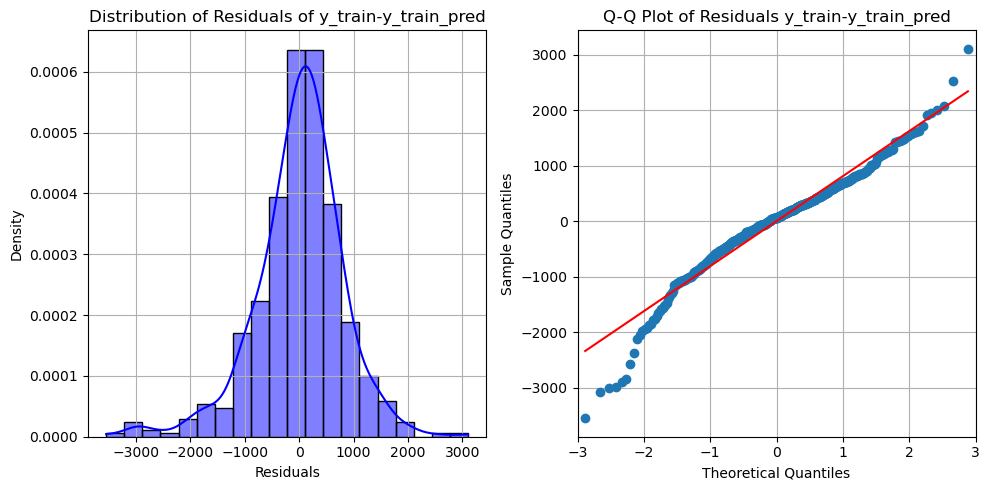

In [49]:
plt.figure(figsize = (10, 5))
# Plotting the distribution of residuals
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.histplot(res, kde=True, stat="density", color='blue', bins=20)
plt.title('Distribution of Residuals of y_train-y_train_pred')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.grid(True)

# Creating the Q-Q plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sm.qqplot(res, line='s', ax=plt.gca())
plt.title('Q-Q Plot of Residuals y_train-y_train_pred')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()

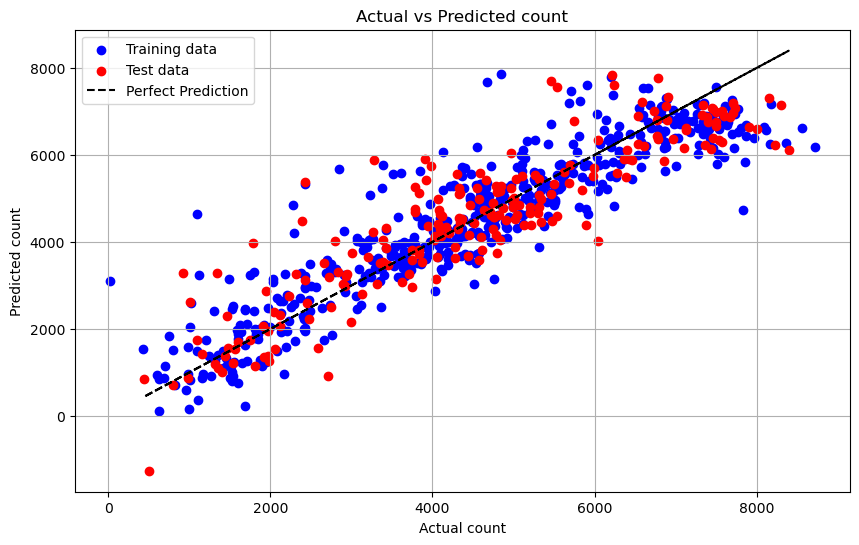

In [50]:
# Plotting the actual vs predicted values for the training data
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values for train data
plt.scatter(y_train, y_train_pred, color="blue", label="Training data")

# Scatter plot of actual vs predicted values for test data
plt.scatter(y_test, y_test_pred, color="red", label="Test data")
# Plot the perfect prediction line (y = x)
plt.plot(y_test, y_test, color="black", linestyle="--", label="Perfect Prediction")
# Adding labels and title
plt.title('Actual vs Predicted count')
plt.xlabel('Actual count')
plt.ylabel('Predicted count')
plt.legend()
plt.grid(True)
plt.show()

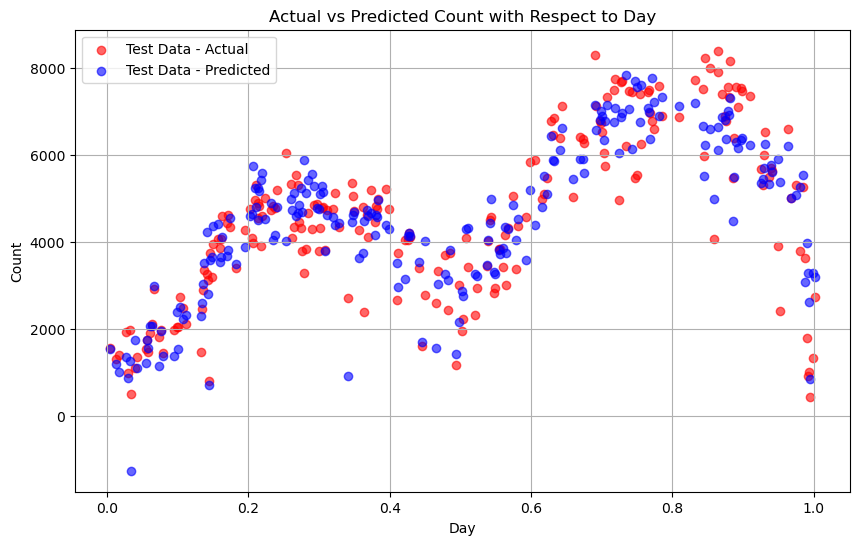

In [51]:
# Plotting the actual vs predicted values with respect to 'day'
plt.figure(figsize=(10, 6))

# # Scatter plot of actual vs predicted values for training data (day vs actual count and day vs predicted count)
# plt.scatter(df_train['day'], y_train, color="blue", label="Training Data - Actual", alpha=0.6)
# plt.scatter(df_train['day'], y_train_pred, color="green", label="Training Data - Predicted", alpha=0.6)

# Scatter plot of actual vs predicted values for test data (day vs actual count and day vs predicted count)
plt.scatter(df_test['day'], y_test, color="red", label="Test Data - Actual", alpha=0.6)
plt.scatter(df_test['day'], y_test_pred, color="blue", label="Test Data - Predicted", alpha=0.6)

# Adding labels and title
plt.title('Actual vs Predicted Count with Respect to Day')
plt.xlabel('Day')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()


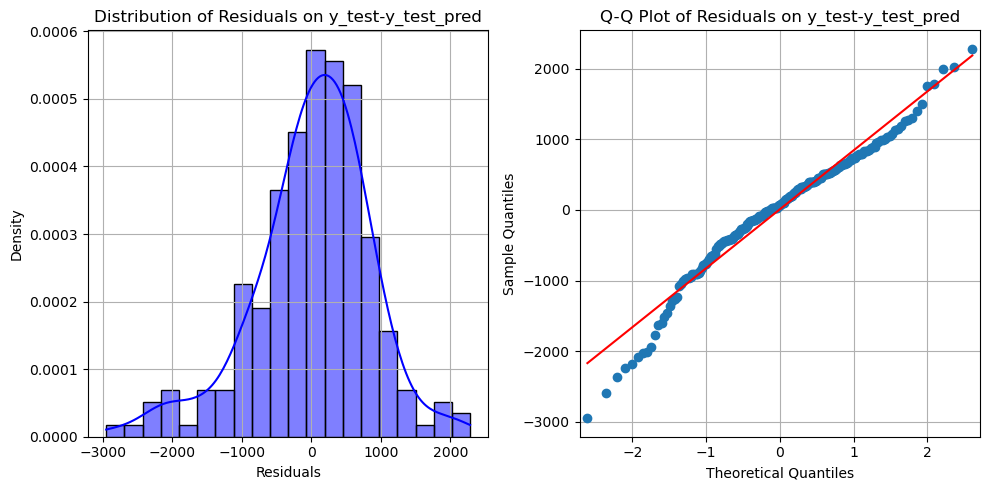

In [52]:

restest=y_test-y_test_pred

plt.figure(figsize = (10, 5))
# Plotting the distribution of residuals
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.histplot(restest, kde=True, stat="density", color='blue', bins=20)
plt.title('Distribution of Residuals on y_test-y_test_pred')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.grid(True)

# Creating the Q-Q plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sm.qqplot(restest, line='s', ax=plt.gca())
plt.title('Q-Q Plot of Residuals on y_test-y_test_pred')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()